In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import math
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import datetime
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import model_selection, metrics, preprocessing
from tqdm import tqdm

In [2]:
#read csv data 
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#list of categorical features
feature_columns = ['sex','cp','trestbps','slope','ca','thal']

In [7]:
#function to change categorical features to one hot variables
def dummy_df(df,to_list):
    for x in to_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df, dummies] , axis = 1)
    return df

In [8]:
#creat a new dataFrame with one hot coded variables
df = dummy_df(heart_data, feature_columns)

In [9]:
df.shape

(303, 75)

In [10]:
df.columns

Index(['age', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'trestbps_94', 'trestbps_100', 'trestbps_101', 'trestbps_102',
       'trestbps_104', 'trestbps_105', 'trestbps_106', 'trestbps_108',
       'trestbps_110', 'trestbps_112', 'trestbps_114', 'trestbps_115',
       'trestbps_117', 'trestbps_118', 'trestbps_120', 'trestbps_122',
       'trestbps_123', 'trestbps_124', 'trestbps_125', 'trestbps_126',
       'trestbps_128', 'trestbps_129', 'trestbps_130', 'trestbps_132',
       'trestbps_134', 'trestbps_135', 'trestbps_136', 'trestbps_138',
       'trestbps_140', 'trestbps_142', 'trestbps_144', 'trestbps_145',
       'trestbps_146', 'trestbps_148', 'trestbps_150', 'trestbps_152',
       'trestbps_154', 'trestbps_155', 'trestbps_156', 'trestbps_160',
       'trestbps_164', 'trestbps_165', 'trestbps_170', 'trestbps_172',
       'trestbps_174', 'trestbps_178', 'trestbps_180', 'trestbps_192',
       'tre

In [11]:
import pandas_profiling
x=pandas_profiling.ProfileReport(heart_data)

In [12]:
x

In [13]:
#distinct view of target variable
df['target'].unique()

array([1, 0])

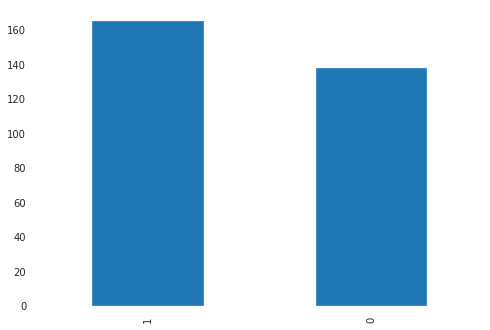

In [14]:
df['target'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
#distribution of target variable
df['target'].value_counts()/len(df)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [16]:
x = df.drop(['target'],axis = 1)

In [17]:
y = df['target']

In [18]:
#creating train - test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
#building model with default hyper parameters
xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
y_prob_xgb = xgb.predict_proba(x_test)

In [20]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[22  5]
 [ 6 28]]


In [21]:
precision_score(y_test,y_pred_xgb)

0.8484848484848485

In [22]:
recall_score(y_test,y_pred_xgb)

0.8235294117647058

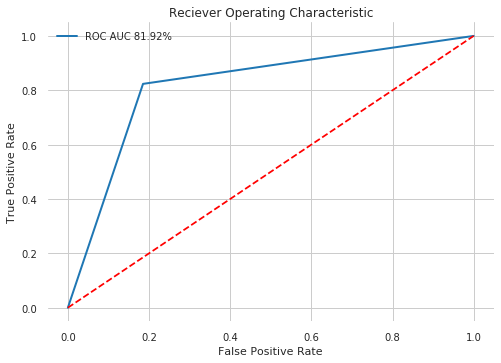

In [23]:
fpr,tpr, thresholds = roc_curve(y_test,y_pred_xgb)
def plot_roc_curve(fpr,tpr,label = None):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr, linewidth =2,label = f"ROC AUC {roc_auc:.2%}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characteristic")
    ax.grid()
plot_roc_curve(fpr,tpr)
plt.show()

In [24]:
# keep probabilities for the positive outcome only ( heart disease)
y_prob_xgb_pisitive = y_prob_xgb[:, 1]

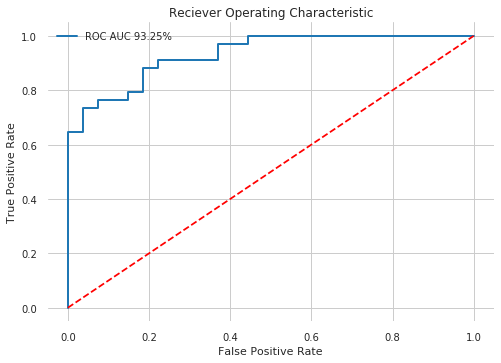

In [25]:
fpr,tpr, thresholds = roc_curve(y_test,y_prob_xgb_pisitive)
def plot_roc_curve(fpr,tpr,label = None):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr, linewidth =2,label = f"ROC AUC {roc_auc:.2%}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characteristic")
    ax.grid()
plot_roc_curve(fpr,tpr)
plt.show()

In [26]:
sss = model_selection.StratifiedShuffleSplit(random_state=42, n_splits=50)

In [27]:
#pipleline to tuning hyper parameters with grid search
param_grid_pipeline = [
        {"n_estimators": np.arange(1, 250, 25)},
        {'max_depth':range(1, 5), 'min_child_weight':range(1,6,2)},
        {"scale_pos_weight": np.linspace(0, 1, 10)},
        {'gamma':[i/10.0 for i in range(0,5)]},
        {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]},
        {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]},
        {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]},
        {"n_estimators": np.arange(1, 250, 25)},
    ]

In [28]:
#crossvalidation
def run_param_grid_pipeline(model, param_grid_pipeline, X_train, y_train, *args, **kwargs):
    all_cv_results = []
    for param_grid in tqdm(param_grid_pipeline):
        model, cv_results = tune_model(model, param_grid, X_train, y_train, *args, **kwargs)
        all_cv_results.append(pd.DataFrame(cv_results))
    return model, all_cv_results

In [29]:
def tune_model(model, param_grid, x_train, y_train, *args, **kwargs):
    xgboost_gs = model_selection.GridSearchCV(model, param_grid, scoring="roc_auc", return_train_score=True,
                                              *args, **kwargs)
    xgboost_gs.fit(x_train, y_train)
    cv_results = pd.DataFrame(xgboost_gs.cv_results_)
    return xgboost_gs.best_estimator_, cv_results

In [30]:
tune_model(xgboost.XGBClassifier(), param_grid_pipeline, x_train, y_train,
                                                                 n_jobs=4, cv=sss)

(XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
        importance_type='gain', interaction_constraints=None,
        learning_rate=0.300000012, max_delta_step=0, max_depth=1,
        min_child_weight=5, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=0, num_parallel_tree=1,
        objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
        validate_parameters=False, verbosity=None),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.003765      0.003363         0.001562        0.000197   
 1        0.014250      0.000200         0.001461        0.000083   
 2        0.023639      0.000392         0.001457        0.000037   
 3        0.032205      0.001251         0.001489        0.000038   
 4        0.039752      0.000780         0.001537        0.000044   
 ..     

In [31]:
def plot_all_cv_results(all_cv_results):
    steps = len(all_cv_results)
    fig, axes = plt.subplots(steps, figsize=(20, steps * 7), sharey=True)

    for i, cv_results in enumerate(all_cv_results):
        best_result_index = cv_results.mean_test_score.values.argmax()
        best_param = cv_results["params"].iloc[best_result_index]
        cv_results[["mean_test_score", "params"]].set_index("params").plot(ax=axes[i], marker="o", color="b")
        cv_results[["mean_train_score", "params"]].set_index("params").plot(ax=axes[i], marker="o", color="r")
        axes[i].set_ylabel(f"Best Param {best_param}")

        for j, row in enumerate(cv_results[["mean_test_score", "params"]].set_index("params").itertuples()):
            axes[i].text(j, row.mean_test_score, row.Index, rotation=270, rotation_mode="anchor")

100%|██████████| 8/8 [00:21<00:00,  2.65s/it]


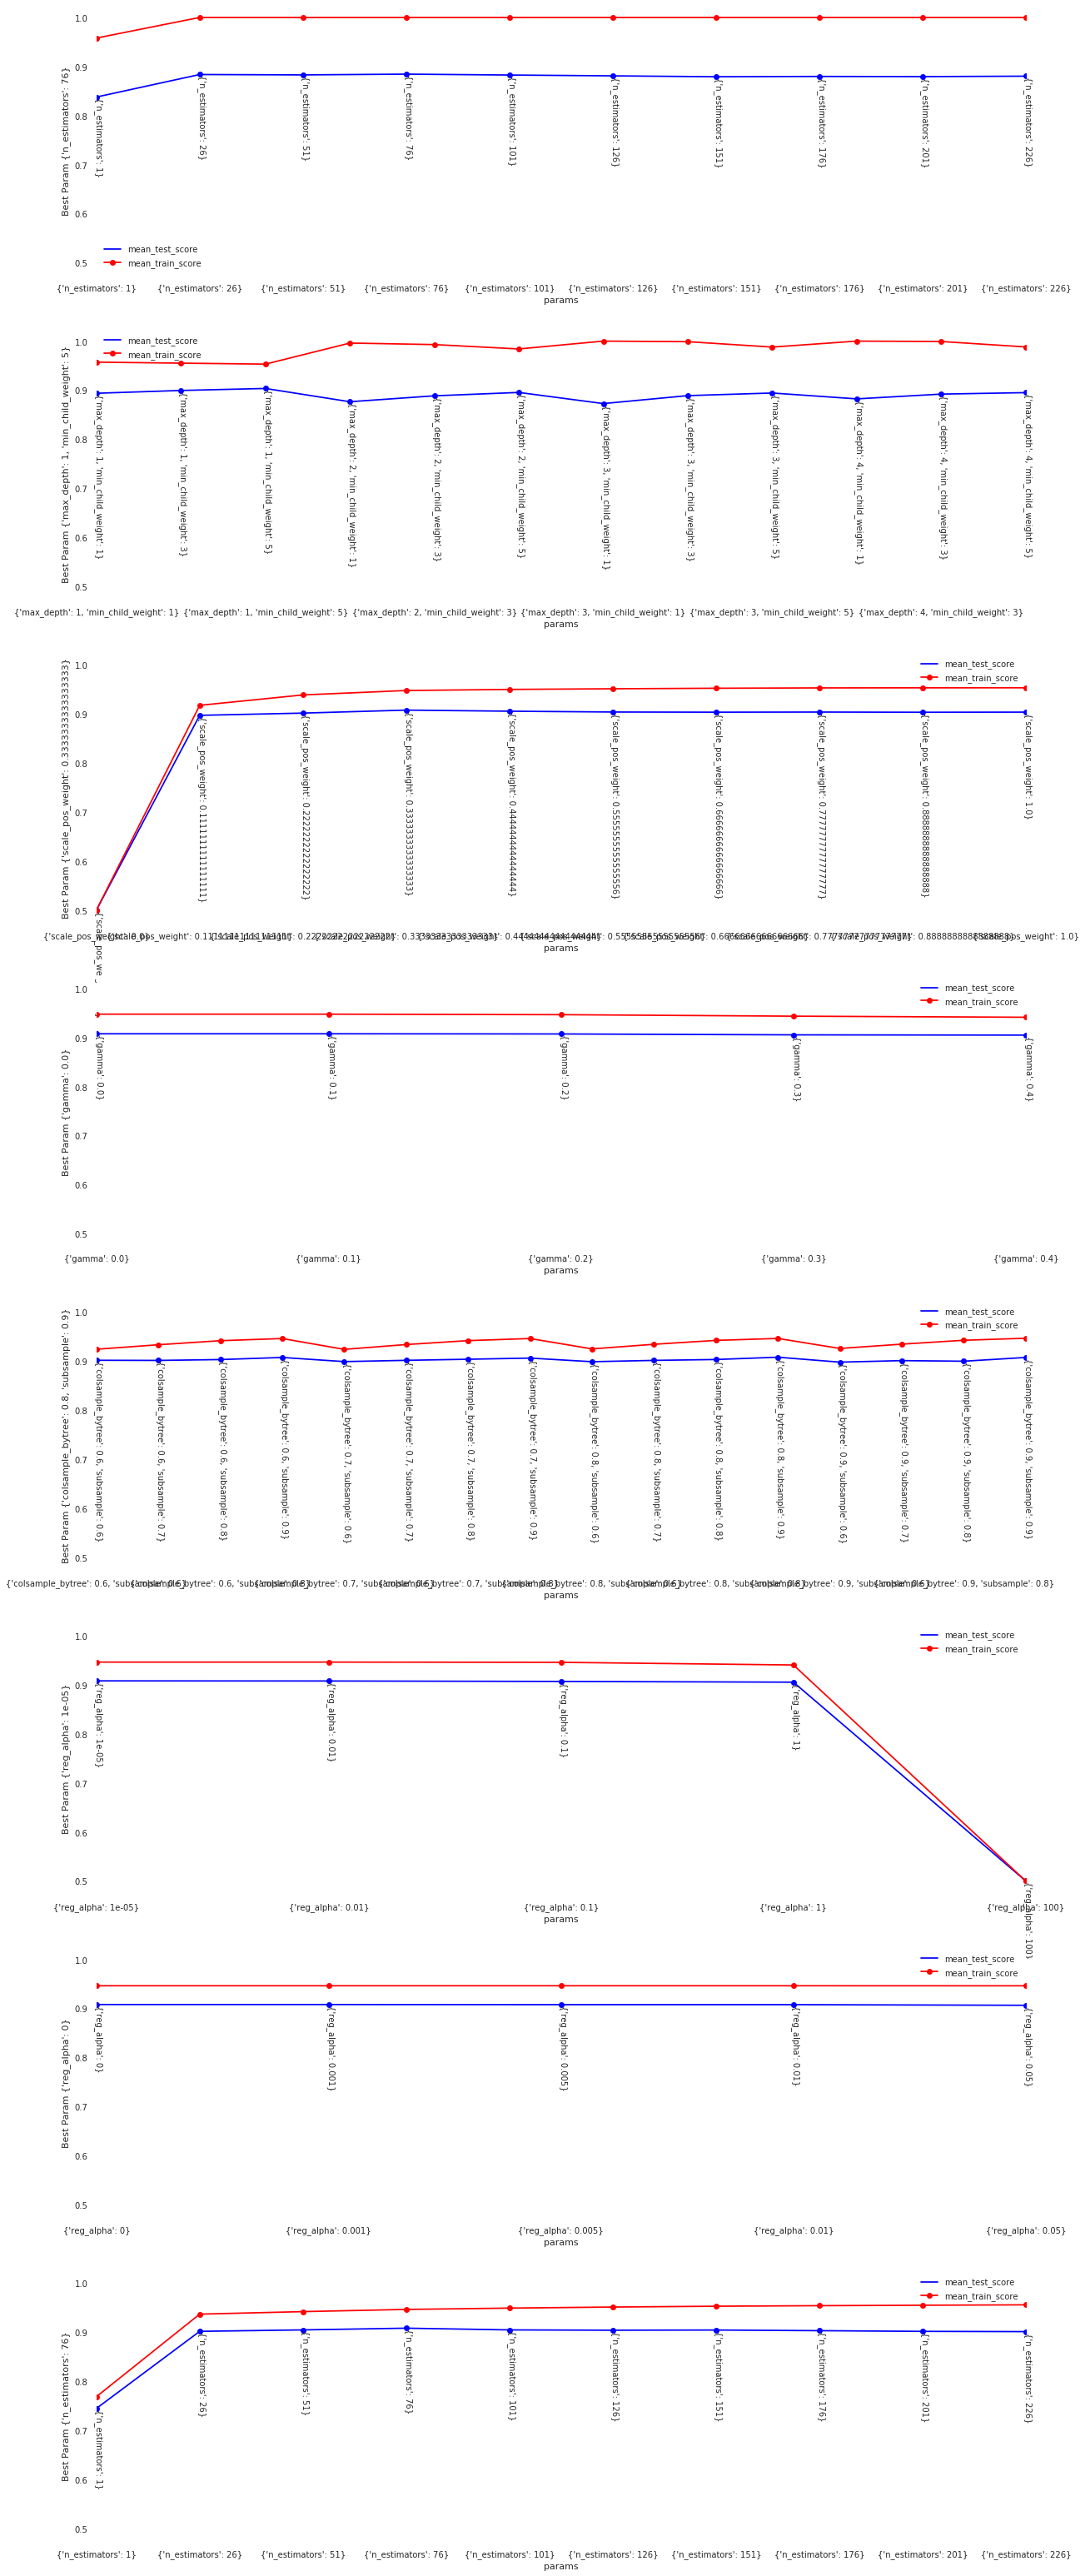

In [32]:
xgboost_pipe_clf, xgboost_pipe_results = run_param_grid_pipeline(xgboost.XGBClassifier(), param_grid_pipeline, x_train, y_train,
                                                                 n_jobs=4, cv=sss)
plot_all_cv_results(xgboost_pipe_results)

In [33]:
y_prob_xgb_pipe_clf = xgboost_pipe_clf.predict_proba(x_test)

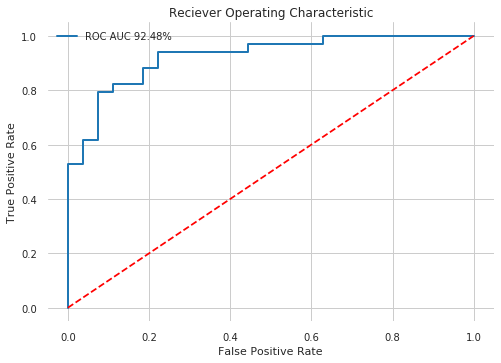

In [34]:
fpr_proba,tpr_proba, thresholds = roc_curve(y_test,y_prob_xgb_pipe_clf[:,1])
plot_roc_curve(fpr_proba,tpr_proba)
plt.show()

In [35]:
def plot_auc_metrics(X, y, model):
    fpr, tpr, thresholds = metrics.roc_curve(y, model.predict(X))
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC AUC {roc_auc:.2%}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characteristic")
    return plt.show()

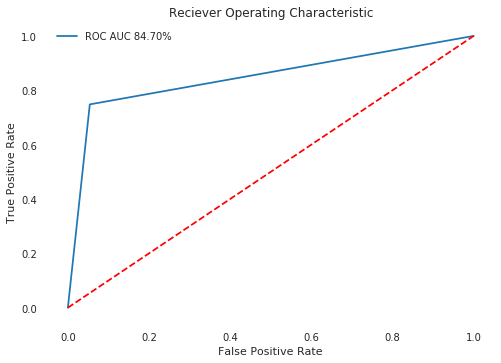

In [48]:
plot_auc_metrics(x_train, y_train, xgboost_pipe_clf)

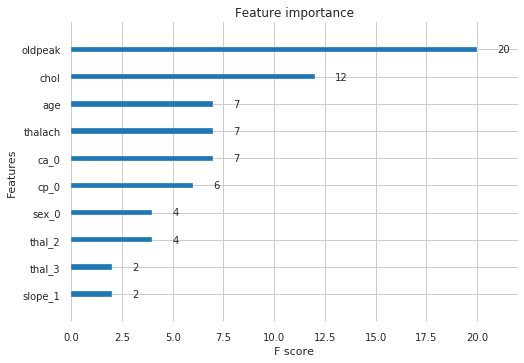

In [36]:
#feature importance with tuning parameters
from xgboost import plot_importance
plot_importance(xgboost_pipe_clf, max_num_features=10) # top 10 most important features
plt.show()

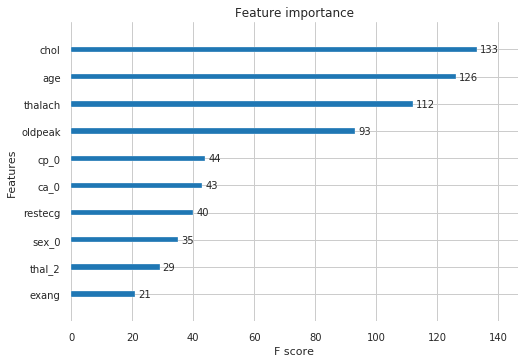

In [37]:
#feature importance with default parameters
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10) # top 10 most important features
plt.show()